# "Predicting Customer Churn with Neural Networks: A Deep Learning Approach"

The Customer Churn ML model using Artificial Neural Networks helps businesses predict and understand customer churn, which refers to the rate at which customers stop doing business with a company. By utilizing neural networks and machine learning, the model can analyze patterns and factors contributing to customer churn, providing insights for businesses to take proactive measures. This could include targeted retention strategies, improved customer service, or personalized offerings to mitigate the impact of customer attrition and enhance overall customer satisfaction and loyalty.

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from rich import print

In [6]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
#drop customerID column since its not useful in the data
#check the datatypes
df.drop("customerID", axis="columns", inplace=True)
df.dtypes

gender                int64
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#change the datatype of TotalCharges column to Numeric
#float
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
#show the rows for which the TotalCharges are blanks

df = df[pd.to_numeric(df.TotalCharges,errors = 'coerce').notnull()]
df.shape

(7032, 21)

In [17]:
#the totalcharges data types are converted to floats

df.TotalCharges = pd.to_numeric(df.TotalCharges)

df.TotalCharges.dtypes

C:\Users\user\AppData\Local\Temp\ipykernel_11144\3408106132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges = pd.to_numeric(df.TotalCharges)


dtype('float64')

# Vizualisation

In [9]:
#visualize the tenure column - number of customers leaving and number of customers not leaving

df[df.Churn == "No"].shape
df[df.Churn == "Yes"].shape

(1869, 21)

So from the dataset 5163 customers aren't leaving while 1869 are leaving out of 7032 customers 


In [10]:
# find the tenure of the customers not leaving 
tenure_churn_no = df[df.Churn == "No"].tenure 
# find the tenure of the customers leaving 
tenure_churn_yes = df[df.Churn == "Yes"].tenure

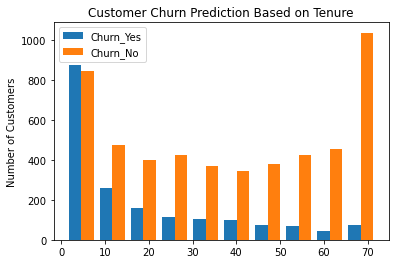

In [11]:
#plot the two

plt.hist([tenure_churn_yes,tenure_churn_no], label=['Churn_Yes', 'Churn_No'])
plt.xlabel="tenure"
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Based on Tenure")
plt.legend();

From the chart, The MORE the tenure, the LESS number of customers leave. 
Or rather, Customer Churn DECREASES with an INCREASE in tenure.

In [21]:
# find the MonthlyCharges  of the customers not leaving 
MC_churn_no = df[df.Churn == "No"].MonthlyCharges  
# find the MonthlyCharges  of the customers leaving 
MC_churn_yes = df[df.Churn == "Yes"].MonthlyCharges 

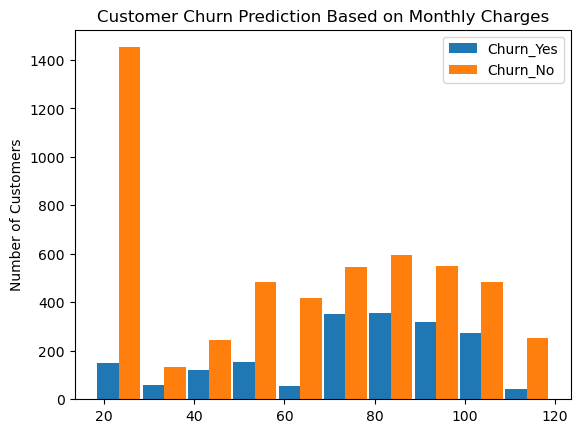

In [22]:
plt.hist([MC_churn_yes,MC_churn_no], rwidth=0.95, label=['Churn_Yes', 'Churn_No'])
plt.xlabel="MonthlyCharges"
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Based on Monthly Charges")
plt.legend();

Monthly Charges between 70 and 100 registered the Highest Customer Churn Number of Customers.

In [12]:
# create a function to find the unique values in each column whose dtype is 'object'
def print_unique_column_values(df):
    for column in df:
        if df[column].dtypes=="object":
            print(f'{column} : {df[column].unique()}')

In [13]:
print_unique_column_values(df)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender : ['Female' 'Male']

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

PhoneService : ['No' 'Yes']

MultipleLines : ['No phone service' 'No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn : ['No' 'Yes']

From the Unique values, we find there's a series of 'No internet service, Yes, No'. Let's replace the 'No internet Service' and 'No phone service' with No.

In [14]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [15]:
print_unique_column_values(df)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender : ['Female' 'Male']

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

PhoneService : ['No' 'Yes']

MultipleLines : ['No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes']

OnlineBackup : ['Yes' 'No']

DeviceProtection : ['No' 'Yes']

TechSupport : ['No' 'Yes']

StreamingTV : ['No' 'Yes']

StreamingMovies : ['No' 'Yes']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn : ['No' 'Yes']

In [16]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn']
for cols in yes_no_cols:
        df[cols].replace({'Yes': 1, 'No': 0}, inplace= True)

In [17]:
for cols in df:
    print(f'{cols} : {df[cols].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender : ['Female' 'Male']

SeniorCitizen : [0 1]

Partner : [1 0]

Dependents : [0 1]

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService : [0 1]

MultipleLines : [0 1]

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : [0 1]

OnlineBackup : [1 0]

DeviceProtection : [0 1]

TechSupport : [0 1]

StreamingTV : [0 1]

StreamingMovies : [0 1]

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : [1 0]

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn : [0 1]

In [18]:
df['gender'].replace({'Female': 1, 'Male': 0}, inplace= True)

# Perfom One Hot Encoding

The purpose of one-hot encoding is to represent categorical variables as binary vectors, making it easier for machine learning models to process and interpret the data. 

What happens here is that for each unique values in a column, a dummy is created. For instance using InternetService column, 3 columns will be created, each rep the uniq values. Now, if the column reads for example DSL, the other created columns will be assigned a 0, while the DSL value column will be 1. 
Same applies to all the other uniq values.

In [19]:
df1 = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df1.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3533,4318-RAJVY,1,0,0,0,10,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5674,3566-CAAYU,1,0,1,1,64,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [20]:
df1.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic    

# Scaling Data

The purpose of scaling data is to bring all features to a standard range, making them comparable and ensuring that certain features do not dominate others.

In [21]:
# scale columns to come to 0 & 1 range

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [24]:
df1 = X = df1.drop(columns='customerID')
df1.sample(3)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4159,1,1,0,0,0.816901,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
5078,1,0,1,1,0.929577,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
2009,0,0,1,1,0.971831,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0


What happened is that the Tenure, MonthlyCharges, TotalCharges col values were converted to a range of 1 and 0.

# Model Building

Train, Test, Split

In [25]:
# figure out the train and test data
X = df1.drop(columns='Churn')
y = df1["Churn"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(5625, 26)

In [27]:
X_test.shape

(1407, 26)

# Create a Neural Network

In [31]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 100) # you can use any epoch number u want to increase your accuracy

Epoch 1/100
176/176 [==============================] - 5s 10ms/step - loss: 0.5395 - accuracy: 0.7262
Epoch 2/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4390 - accuracy: 0.7870
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4245 - accuracy: 0.7980
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4200 - accuracy: 0.7996
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4168 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4146 - accuracy: 0.8041
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4141 - accuracy: 0.8057
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4126 - accuracy: 0.8053
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4114 - accuracy: 0.8048
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4105 - accur

Using epochs=100, i got an accuracy of 0.8265

In [32]:
# evaluate the model on X_test & y_test

model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 5ms/step - loss: 0.4536 - accuracy: 0.7825


[0.4535588324069977, 0.7825160026550293]

# Predict

In [34]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 4ms/step


array([[0.01097551],
       [0.04935092],
       [0.7575246 ],
       [0.03217615],
       [0.23769654]], dtype=float32)

In [37]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [35]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [36]:
y_pred[:5]

[0, 0, 1, 0, 0]

Classification Report

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))


precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

Plot the Confusion Matrix

Text(0.5, 1.0, 'Truth VS Predicted')

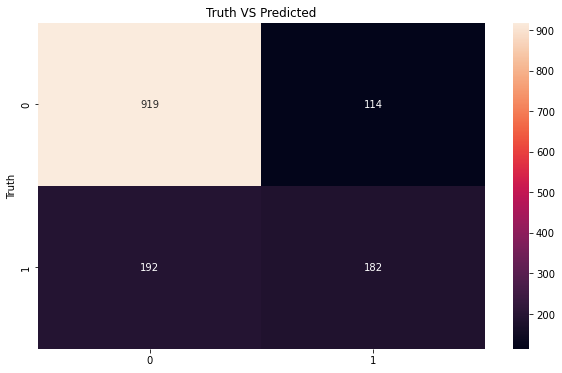

In [45]:
import seaborn as sns 
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.ylabel("Truth");
plt.title("Truth VS Predicted")
#xlabel = 'Predicted'

This means that when Truth is 1 (thats when the customer is leaving), the model Predicted 182 times to be True but 192 times, predicted an error. Similarly, when the Truth is 0 (thats when the customer is not leaving), the model predicted 919 times to be true, and 114 times as an error
 

To conclude, the model predicted (192+114) errors and (919+182) correct predictions

# Accuracy Score


The F1-score is a metric that combines both precision and recall, providing a balance between the two. It is defined as the harmonic mean of precision and recall. 

In [47]:
round((919+182)/(919+182+192+114),2)

0.78

From the Classification Report above, the f1 score accuracy is the same as our accuracy score meaning that we are right about our model

# Precision



Precision is a metric that measures the accuracy of the positive predictions made by a classifier. It is defined as the ratio of true positive predictions to the sum of true positives and false positives.

for the 0 class (customers who didnt churn)

In [52]:
round(919/(919+192),2) # same as the precision in our above classification report

0.83

for the 1 class (customers who did churn)


In [54]:
round(182/(182+114),2) # same as the precision in our above classification report

0.61

# Recall

Recall, also known as Sensitivity or True Positive Rate, is a metric that measures the ability of a classifier to correctly identify all relevant instances. It is defined as the ratio of true positive predictions to the sum of true positives and false negatives.

In [56]:
# for the 0 class (customers who didnt churn)

round(919/(919+114),2)

0.89

In [59]:
#for the 1 class (customers who did churn)

round(182/(192+182),2)

0.49